In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os
import sys
from obspy import UTCDateTime
import scienceplots

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams.update({
    'font.size': 8,             # Set global font size
    'font.family': 'Arial',      # Set global font family
    'legend.fontsize': 8,        # Set legend font size
    'figure.figsize': (5.5, 3.5) # Set figure size in inches
})
# plt.style.use('science')  # Use the science style for plots

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
bold_colors = [
    "#e6194b",  # Vivid Red
    "#3cb44b",  # Vivid Green
    "#ffe119",  # Bright Yellow
    "#4363d8",  # Bold Blue
    "#f58231",  # Strong Orange
    "#911eb4",  # Bold Purple
    "#46f0f0",  # Cyan / Aqua
    "#f032e6",  # Hot Pink
    "#bcf60c",  # Lime Green
]

In [3]:
bold_colors[1]

'#3cb44b'

In [4]:
label_dir = "../../label/utc0_data/"
filenames = os.listdir(label_dir)
filenames.sort()

row: 0, col: 0
row: 0, col: 1
row: 0, col: 2
row: 1, col: 0
row: 1, col: 1
row: 1, col: 2
row: 2, col: 0
row: 2, col: 1
row: 2, col: 2


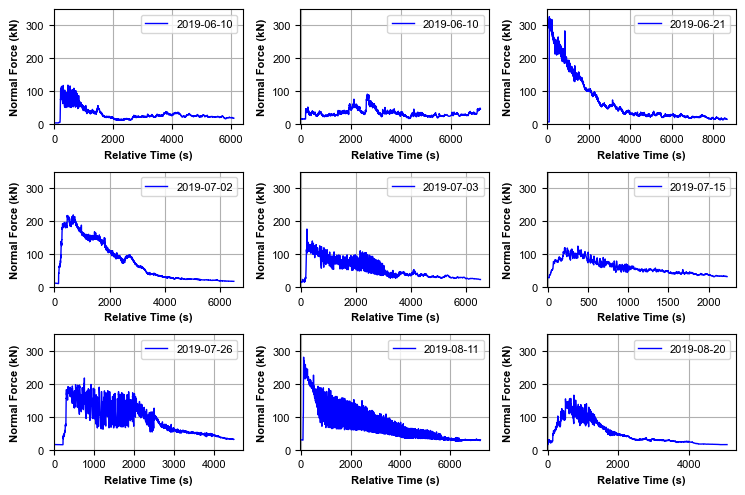

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(7.5, 5))
row, col = 0, -1
for j, filename in enumerate(filenames):
    if j != 0:
        if (j) % 3 == 0:
            row += 1
    col += 1
    if col == 3:
        col = 0
    print(f"row: {row}, col: {col}")
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(label_dir, filename), index_col=0)
        rel_time = []
        for i, df_row in df.iterrows():  # Rename 'row' to 'df_row'
            rel_time.append(UTCDateTime(df_row[-1]) - UTCDateTime(df.iloc[0, -1]))
        df['Relative_time'] = rel_time
        # Extract the first column (assuming it's the one you want to plot)
        # Plot the data
        name = f"{filename[:4]}-{filename[4:6]}-{filename[6:8]}"
        ax[row, col].plot(df['Relative_time'], df['Fv [kN]'], label=name, linewidth=1, alpha=1, color='blue')  # Use filename without extension as label
        ax[row, col].set_xlabel('Relative Time (s)', fontdict={"fontsize": 8, 'fontweight':'bold'})
        ax[row, col].set_ylabel('Normal Force (kN)', fontdict={"fontsize": 8, 'fontweight':'bold'})
        ax[row, col].set_ylim(0, 350)
        ax[row, col].set_xlim(left=-20)
        ax[row, col].grid(True)
        ax[row, col].legend()
plt.tight_layout()
fig.savefig("../output_plots/impact_force_over_time.png", dpi=300)

row: 0, col: 0
row: 0, col: 1
row: 0, col: 2
row: 1, col: 0
row: 1, col: 1
row: 1, col: 2
row: 2, col: 0
row: 2, col: 1
row: 2, col: 2


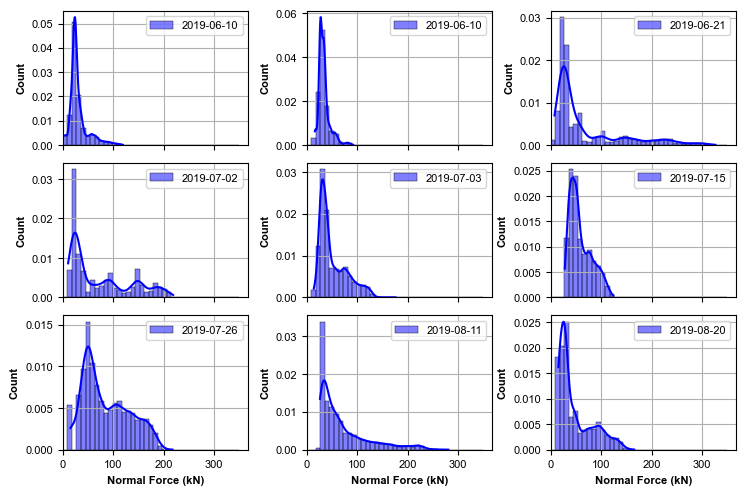

In [38]:
fig, ax = plt.subplots(3, 3, figsize=(7.5, 5), sharex=True)
row, col = 0, -1
for j, filename in enumerate(filenames):
    if j != 0:
        if (j) % 3 == 0:
            row += 1
    col += 1
    if col == 3:
        col = 0
    print(f"row: {row}, col: {col}")
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(label_dir, filename), index_col=0)
        name = f"{filename[:4]}-{filename[4:6]}-{filename[6:8]}"
        sns.histplot(df['Fv [kN]'], ax = ax[row,col], bins = np.linspace(0, 350, 40), label=name, color= 'blue', stat='density', kde=True)
        ax[row,col].set_xlabel('Normal Force (kN)', fontdict={"fontsize": 8, 'fontweight':'bold'})
        ax[row,col].set_ylabel('Count', fontdict={"fontsize": 8, 'fontweight':'bold'})
        # ax.set_title('Impact force over time')
        ax[row,col].set_xlim(left=0)
        ax[row,col].legend()
        ax[row,col].grid(True)
fig.tight_layout()
fig.savefig("../output_plots/impact_force_distribution.png", dpi=300)

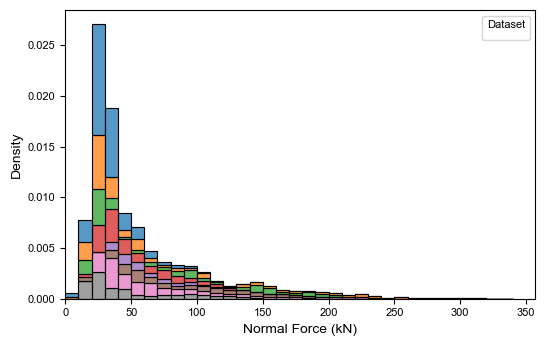

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

# Initialize an empty DataFrame to combine all data
combined_data = pd.DataFrame()

for i, filename in enumerate(filenames):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(label_dir, filename), index_col=0)
        name = f"{filename[:4]}-{filename[4:6]}-{filename[6:8]}"
        df['Dataset'] = str(name)  # Add a column to identify the dataset
        combined_data = pd.concat([combined_data, df], ignore_index=True)

# Plot the stacked histogram
sns.histplot(
    data=combined_data,
    x='Fv [kN]',
    hue='Dataset',
    bins=np.arange(0, 350, 10),
    multiple='stack',  # Stacked histogram
    ax=ax,
    palette='tab10',  # Use a color palette
    stat='density'
)

# Customize the plot
ax.set_xlabel('Normal Force (kN)', fontdict={"fontsize": 10})
ax.set_ylabel('Density', fontdict={"fontsize": 10})
ax.set_xlim(left=0)
ax.legend(title='Dataset')
plt.tight_layout()

# Save the figure
fig.savefig("../output_plots/impact_force_distribution_stacked.png", dpi=300)

0        2019-06-10
1        2019-06-10
2        2019-06-10
3        2019-06-10
4        2019-06-10
            ...    
53938    2019-08-20
53939    2019-08-20
53940    2019-08-20
53941    2019-08-20
53942    2019-08-20
Name: Dataset, Length: 53943, dtype: object

# Time shift

In [16]:
df = pd.read_csv(f"../../label/DF_velocity_data.csv")
df = df.iloc[:9]

In [19]:
[print(f"{i:.2f}") for i in (df['Time_to_plate(s)'] / 60).values]

5.75
2.02
0.76
1.30
6.33
1.48
0.58
0.72
5.62


[None, None, None, None, None, None, None, None, None]

# View data

In [13]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
import os
from obspy import UTCDateTime, read
import scienceplots

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams.update({
    'font.size': 8,             # Set global font size
    'font.family': 'Arial',      # Set global font family
    'legend.fontsize': 8,        # Set legend font size
    'figure.figsize': (5.5, 3.5) # Set figure size in inches
})
# plt.style.use('science')  # Use the science style for plots

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [14]:
def load_label(date_list: list, station: str, interval_seconds: int, time_shift_minutes, trim:bool = True, smoothing: int | None = 30) -> pd.DataFrame:
    time_window = 5

    if smoothing == None or smoothing == 0:
        data_col = "Fv [kN]"
    else:
        data_col = f"moving_avg_{smoothing}"
    
    total_target = None
    try:
        trim_df = pd.read_csv(f"../../label/correct_metrics_time_window.csv")
    except FileNotFoundError:
        trim_df = pd.read_csv(f"{paths['LOCAL_BASE_DIR']}/label/correct_metrics_time_window.csv")
    trim_df['Start_Time'] = trim_df['Start_Time'].apply(UTCDateTime)
    trim_df['End_Time'] = trim_df['End_Time'].apply(UTCDateTime)
    trim_df['Julday'] = trim_df['Start_Time'].apply(lambda x: x.julday)
    for i, date in enumerate(date_list):
        julday = UTCDateTime(date).julday
        present_trim = trim_df[trim_df['Julday'] == julday]
        if i == 0:
            if trim:
                # Use the first row of trim_df for the first date
                target_start_time = present_trim.iloc[0, 0] - (5 * 60)  # Offset by 5/10 minutes
                if julday == 161:
                    # Special case for julday 161, use the second row for the end time
                    target_end_time = present_trim.iloc[1, 1] 
                else:
                    target_end_time = present_trim.iloc[0, 1] + (5 * 120)
            else:
                target_start_time = UTCDateTime(f"{date}") + (5 * 60)  # Offset by 5/10 minutes
                target_end_time = None
        else:
            if trim:
                # Use the second row of trim_df for subsequent dates
                target_start_time = present_trim.iloc[0, 0] - (5 * 120)
                if julday == 161:
                    # Special case for julday 161, use the second row for the end time
                    target_end_time = present_trim.iloc[1, 1]
                else:
                    target_end_time = present_trim.iloc[0, 1] + (5 * 120)
            else:
                target_start_time = UTCDateTime(f"{date}")
                target_end_time = None
        # Attempt to read CSV file from different paths
        try:
            target = pd.read_csv(f"../../label/data_processed_{time_shift_minutes}/{station}/{date}.csv")
        except FileNotFoundError:
            target = pd.read_csv(f"{paths['LOCAL_BASE_DIR']}/label/data_processed_{time_shift_minutes}/{station}/{date}.csv")

        # Filter data to start after the target start time
        target = target[target['Time'] >= target_start_time]
        if target_end_time is not None:
            target = target[target['Time'] <= target_end_time]

        # Convert Time to Timestamp
        target['Timestamp'] = target['Time'].apply(UTCDateTime).apply(UTCDateTime._get_timestamp)

        if interval_seconds != 1:
            # Apply sliding window mean using NumPy
            num_windows = len(target) // interval_seconds  # Number of full windows
            target = target.iloc[:num_windows * interval_seconds]  # Trim excess data

            # Reshape data for window-based averaging
            reshaped_values = target[data_col].values.reshape(num_windows, interval_seconds)
            averaged_values = np.mean(reshaped_values, axis=1)
            std_values = np.std(reshaped_values, axis=1)

            # Create new DataFrame
            target = pd.DataFrame({
                'Timestamp': target['Timestamp'].values[::interval_seconds],  # Take every stride-th timestamp
                'Fv [kN]': averaged_values,  # Store the computed mean
                'Fv std': std_values
            })
        else:
            target = pd.DataFrame({
                'Timestamp' : target['Timestamp'].values,
                'Fv [kN]' : target['Fv [kN]'].values,
                'Fv std' : target['Fv std'].values
            })
        # Concatenate results
        if total_target is None:
            total_target = target
        else:
            total_target = pd.concat([total_target, target])

    total_target.reset_index(drop=True, inplace=True)
    
    return total_target


In [26]:
julday = 223
date = "2019-08-11"

st = read(f"../../data_srr/Illgraben/2019/ILL11/EHZ/9S.ILL11.EHZ.2019.{julday}.mseed")
label = load_label([date], "ILL11", 5, "dynamic", False, 0)

In [27]:
fig, ax = plt.subplots(figsize=(7.5, 5))
ax.plot(st[0].times("matplotlib"), st[0].data, color='k', alpha=0.9)
ax_twin = ax.twinx()
times = label['Timestamp'].apply(lambda x : UTCDateTime(x).matplotlib_date).to_numpy()
target_output = label['Fv [kN]'].to_numpy()
ax_twin.plot(times, target_output, label="Impact Force Target [kN]", alpha=0.8, color='r',linewidth=1)
ax_twin.set_ylim(bottom=0)
# ax.plot(times, predicted_output, label="Model Prediction", alpha=0.8, color='b',linewidth=1)

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M:%S'))
ax.set_xlim(times[0], times[-1]);

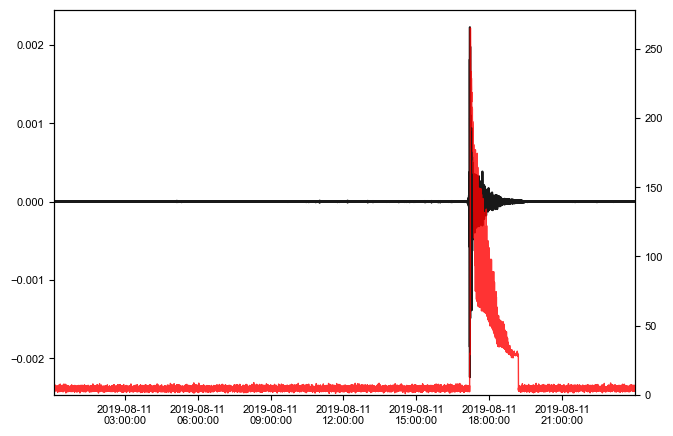

In [28]:
fig